In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt 

In [465]:
data = pd.read_csv("C:/Users/Administrator/Downloads/course_information.csv", parse_dates=['Enrollment_Date','Completion_Date'])
data

,Course_ID,Course_Name,Course_Category,Course_Level,Course_Duration,Course_Credits,Instructor_Name,Enrollment_Date,Completion_Date,Course_Status,Connect_ID
0,54576,Painting Techniques,Physical Education,Beginner,6.0,3.0,David Hernandez,2024-04-20 08:31:48,2024-06-30 08:31:48,Completed,ORG_0
1,82476,Musical Theory,Humanities,Advanced,12.0,3.0,Michael Martinez,2023-10-17 08:31:48,NaT,In Progress,ORG_1
2,66683,World History,Music,Beginner,12.0,4.0,Olivia Jones,2024-03-07 08:31:48,2024-04-21 08:31:48,Completed,ORG_2
3,24275,English Literature,Science,Advanced,12.0,NaN,James Martinez,2024-08-12 08:31:48,2024-10-14 08:31:48,Completed,ORG_3
4,55807,World History,Science,Advanced,6.0,4.0,Ava Williams,2024-01-10 08:31:48,NaT,Not Started,ORG_4
...,...,...,...,...,...,...,...,...,...,...,...
595,43216,Musical Theory,Arts,Intermediate,4.0,2.0,David Jones,2024-09-17 08:31:48,2024-11-22 08:31:48,Completed,ORG_595
596,29325,Painting Techniques,Physical Education,Advanced,8.0,1.0,NaN,2024-04-27 08:31:48,NaT,Not Started,ORG_596
597,17951,Musical Theory,Science,Advanced,6.0,2.0,Ava Johnson,2024-06-14 08:31:48,NaT,Not Started,ORG_597
598,85589,English Literature,Physical Education,Intermediate,12.0,3.0,Emma Davis,2023-11-29 08:31:48,NaT,In Progress,ORG_598


In [438]:
data.shape

(600, 11)

# data cleaning 

In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Course_ID        600 non-null    int64         
 1   Course_Name      571 non-null    object        
 2   Course_Category  588 non-null    object        
 3   Course_Level     600 non-null    object        
 4   Course_Duration  581 non-null    float64       
 5   Course_Credits   534 non-null    float64       
 6   Instructor_Name  571 non-null    object        
 7   Enrollment_Date  580 non-null    datetime64[ns]
 8   Completion_Date  198 non-null    datetime64[ns]
 9   Course_Status    600 non-null    object        
 10  Connect_ID       600 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 51.7+ KB


In [469]:
# change the name from instructor to student 
data.rename(columns={'Instructor_Name':'Students_Name'}, inplace = True)

In [471]:
data.isnull().sum()

Course_ID            0
Course_Name         29
Course_Category     12
Course_Level         0
Course_Duration     19
Course_Credits      66
Students_Name       29
Enrollment_Date     20
Completion_Date    402
Course_Status        0
Connect_ID           0
dtype: int64

<Axes: >

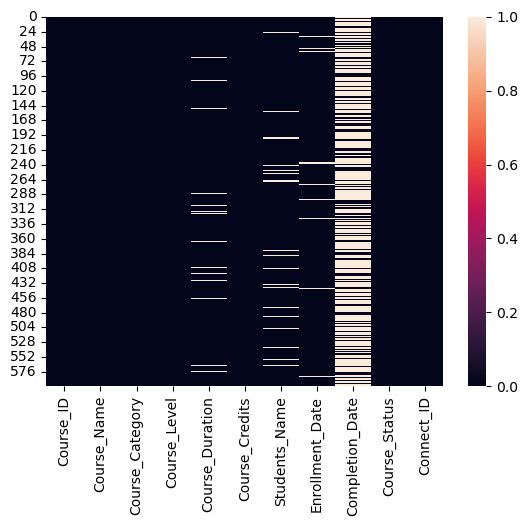

In [412]:
import seaborn as sns
sns.heatmap(data.isnull())

In [473]:
nullValue_percentage = data.isnull()/len(data)* 100
nullValue_percentage.sum()

Course_ID           0.000000
Course_Name         4.833333
Course_Category     2.000000
Course_Level        0.000000
Course_Duration     3.166667
Course_Credits     11.000000
Students_Name       4.833333
Enrollment_Date     3.333333
Completion_Date    67.000000
Course_Status       0.000000
Connect_ID          0.000000
dtype: float64

In [475]:
CourseMode = data['Course_Name'].mode().iloc[0]
data['Course_Name'] = data['Course_Name'].fillna(CourseMode)

In [477]:
Category_Mode = data['Course_Category'].mode().loc[0]
data['Course_Category'] = data['Course_Category'].fillna(Category_Mode)

In [479]:
Category_Mode = data['Course_Category'].mode().loc[0]
data['Course_Category'] = data['Course_Category'].fillna(Category_Mode)

In [481]:
Mode = data['Course_Credits'].mode().loc[0]
data['Course_Credits'] = data['Course_Credits'].fillna(Mode)

In [487]:
# Convert the column to datetime if it's not already
data['Enrollment_Date'] = pd.to_datetime(data['Enrollment_Date'])

# Separate the date and time into new columns
data['Enrollment'] = data['Enrollment_Date'].dt.date
data['Completion'] = data['Completion_Date'].dt.date
data.columns

Index(['Course_ID', 'Course_Name', 'Course_Category', 'Course_Level',
       'Course_Duration', 'Course_Credits', 'Students_Name', 'Enrollment_Date',
       'Completion_Date', 'Course_Status', 'Connect_ID', 'Enrollment',
       'Completion'],
      dtype='object')

In [489]:
# droping student names null values 
data = data.dropna(subset=['Students_Name'])

In [491]:
data = data.drop('Enrollment_Date',axis=1)

In [493]:
data = data.drop('Completion_Date',axis=1)

In [495]:
data.columns

Index(['Course_ID', 'Course_Name', 'Course_Category', 'Course_Level',
       'Course_Duration', 'Course_Credits', 'Students_Name', 'Course_Status',
       'Connect_ID', 'Enrollment', 'Completion'],
      dtype='object')

In [501]:
data= data.dropna(subset=['Enrollment'])

In [503]:
data = data.dropna(subset=['Course_Duration'])
data.isnull().sum()

Course_ID            0
Course_Name          0
Course_Category      0
Course_Level         0
Course_Duration      0
Course_Credits       0
Students_Name        0
Course_Status        0
Connect_ID           0
Enrollment           0
Completion         352
dtype: int64

#How are different courses performing in terms of student completion rates?

In [505]:
data['Course_Duration'].nlargest().head(2)

1    12.0
2    12.0
Name: Course_Duration, dtype: float64

In [31]:
data.head(2)

,Course_ID,Course_Name,Course_Category,Course_Level,Course_Duration,Course_Credits,Students_Name,Course_Status,Connect_ID,Enrollment,Enrollment_Time,Completion,Completion_Time
0,54576,Painting Techniques,Physical Education,Beginner,6.0,3.0,David Hernandez,Completed,ORG_0,2024-04-20,08:31:48,2024-06-30,08:31:48
1,82476,Musical Theory,Humanities,Advanced,12.0,3.0,Michael Martinez,In Progress,ORG_1,2023-10-17,08:31:48,NaT,NaT


In [32]:
#overall completion rate
overall_completion_rate =(data['Course_Status']=='Completed').mean()*100
round(overall_completion_rate,2)

35.39

In [33]:
# overall 35.3 % of students have completed the courses

#Analyze the completion rate based on subject category and level

In [35]:
cat_completion_rate = data.groupby('Course_Category')['Course_Status'].apply(lambda x : (x =='Completed').mean()*100)
round(cat_completion_rate,2)

Course_Category
Arts                  33.33
Humanities            29.89
Math                  42.86
Music                 31.96
Physical Education    34.95
Science               40.86
Name: Course_Status, dtype: float64

In [509]:
#convert it into dataframe to make barplot 
cat_completion_rate = cat_completion_rate.reset_index()

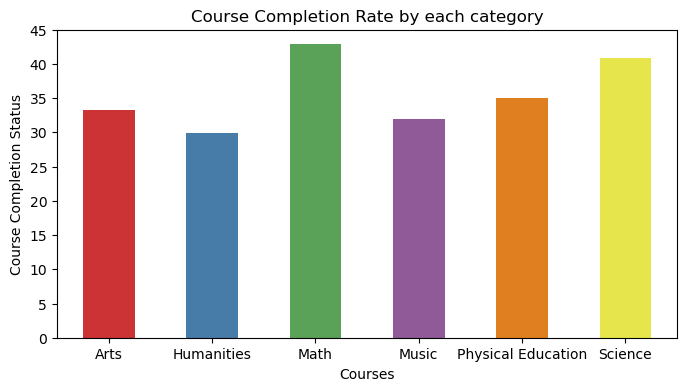

In [507]:
plt.figure(figsize=(8,4))
sns.barplot(x = 'Course_Category', y= 'Course_Status', data = cat_completion_rate, hue ='Course_Category',palette="Set1", width=0.5)
plt.title('Course Completion Rate by each category')
plt.xlabel("Courses")
plt.ylabel("Course Completion Status")
plt.show()

In [38]:
#completion rate of cousres based on level
completion_rate_by_level = data.groupby('Course_Level')['Course_Status'].apply(lambda x :(x =="Completed").mean()*100)
completion_rate_by_level = round(completion_rate_by_level,2).reset_index()
completion_rate_by_level

,Course_Level,Course_Status
0,Advanced,36.17
1,Beginner,41.18
2,Intermediate,28.98


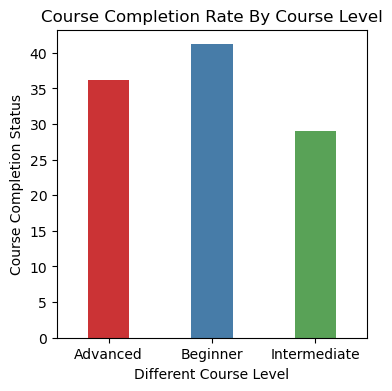

In [85]:
plt.figure(figsize=(4,4))
sns.barplot(x= 'Course_Level', y='Course_Status', data = completion_rate_by_level, hue='Course_Level', palette="Set1", width=0.4)
plt.title("Course Completion Rate By Course Level")
plt.xlabel("Different Course Level")
plt.ylabel("Course Completion Status")
plt.show()

In [40]:
# Beginner level and advanced level of course are performing well.

#Which courses or categories attract the highest enrollment rates? 

In [69]:
Course_With_Highest_Enrollment = data.groupby('Course_Name')['Enrollment'].count().sort_values().reset_index()
Course_With_Highest_Enrollment

,Course_Name,Enrollment
0,Physics 101,63
1,Physical Fitness,66
2,English Literature,69
3,Mathematics Basics,69
4,Painting Techniques,79
5,World History,79
6,Musical Theory,109


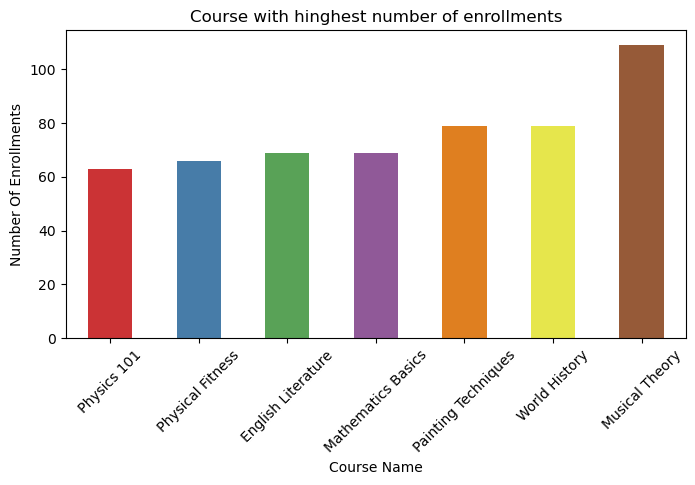

In [179]:
plt.figure(figsize=(8,4))
sns.barplot(x = 'Course_Name', y ='Enrollment', data =Course_With_Highest_Enrollment , hue='Course_Name', palette="Set1", width=0.5)
plt.title("Course with hinghest number of enrollments")
plt.xlabel("Course Name")
plt.ylabel('Number Of Enrollments')
plt.xticks(rotation=45)
plt.show()

#What are the trends in student enrollments over time (monthly, quarterly, annually)? 

In [98]:
data['Enrollment']= pd.to_datetime(data['Enrollment'],errors='coerce')

In [100]:
data['Month'] =data['Enrollment'].dt.to_period('M')
data['Year'] =data['Enrollment'].dt.to_period('Y')
data['Year']

0      2024
1      2023
2      2024
3      2024
4      2024
       ... 
594    2024
595    2024
597    2024
598    2023
599    2023
Name: Year, Length: 534, dtype: period[Y-DEC]

#What are the trends in student enrollments over time (monthly, quarterly, annually)? 

In [181]:
Trend_in_enrollment = data.groupby('Month')['Enrollment'].count().reset_index()
Trend_in_enrollment

,Month,Enrollment
0,2023-09,16
1,2023-10,41
2,2023-11,44
3,2023-12,49
4,2024-01,48
5,2024-02,45
6,2024-03,53
7,2024-04,44
8,2024-05,45
9,2024-06,46


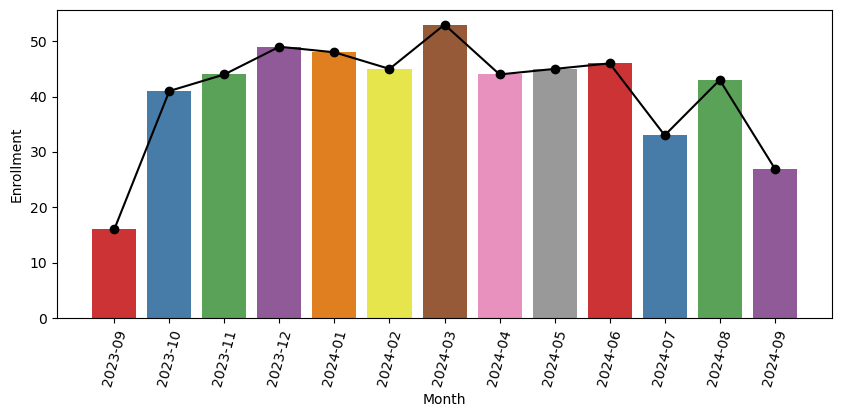

In [167]:
# bar plot
import numpy as np
plt.figure(figsize=(10,4))
sns.barplot(x='Month', y='Enrollment', data =Trend_in_enrollment,hue='Month',palette ='Set1' )
# for tendline 
xcords= np.arange(len(Trend_in_enrollment))
ycords =Trend_in_enrollment['Enrollment'].values
plt.plot(xcords,ycords, color='black', marker='o', linestyle='--', label="Trendline")
plt.xticks(rotation=75)
plt.show()

#Course Category  with the number of enrollments

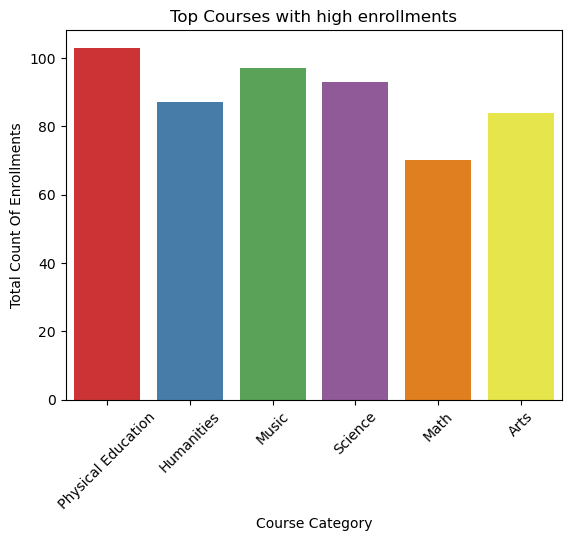

In [51]:
sns.countplot(x = data['Course_Category'], hue=data['Course_Category'], palette="Set1")
plt.title("Top Courses with high enrollments")
plt.xlabel("Course Category")
plt.ylabel("Total Count Of Enrollments")
plt.xticks(rotation=45)
plt.show()

In [201]:
#Does the duration of a course correlate with its completion rates?


In [203]:
data_completed = data[data['Course_Status']=='Completed']
data_completed.head(5)

,Course_ID,Course_Name,Course_Category,Course_Level,Course_Duration,Course_Credits,Students_Name,Course_Status,Connect_ID,Enrollment,Enrollment_Time,Completion,Completion_Time,Month,Year
0,54576,Painting Techniques,Physical Education,Beginner,6.0,3.0,David Hernandez,Completed,ORG_0,2024-04-20,08:31:48,2024-06-30,08:31:48,2024-04,2024
2,66683,World History,Music,Beginner,12.0,4.0,Olivia Jones,Completed,ORG_2,2024-03-07,08:31:48,2024-04-21,08:31:48,2024-03,2024
3,24275,English Literature,Science,Advanced,12.0,1.0,James Martinez,Completed,ORG_3,2024-08-12,08:31:48,2024-10-14,08:31:48,2024-08,2024
7,63876,Mathematics Basics,Humanities,Beginner,8.0,4.0,Olivia Hernandez,Completed,ORG_7,2024-03-13,08:31:48,2024-05-22,08:31:48,2024-03,2024
10,38951,Musical Theory,Math,Beginner,8.0,1.0,James Johnson,Completed,ORG_10,2024-02-29,08:31:48,2024-04-17,08:31:48,2024-02,2024


In [304]:
completion_by_duration =  data_completed.groupby('Course_Duration').size()/data.groupby('Course_Duration').size()*100
completion_by_duration

Course_Duration
4.0     34.453782
6.0     37.588652
8.0     32.592593
12.0    36.690647
dtype: float64

In [322]:
# courses with 6 week of running time is having higher completion rate

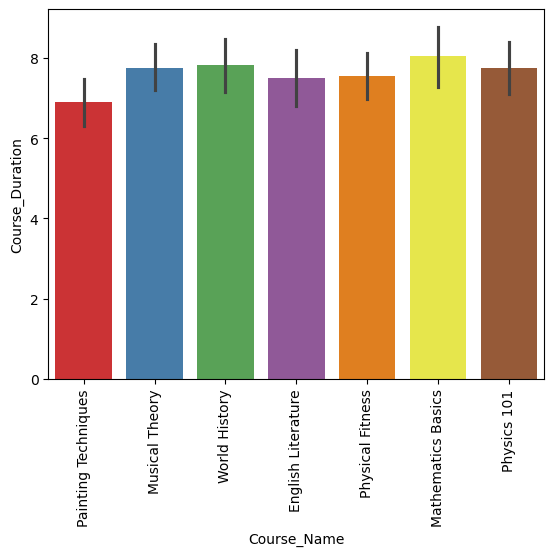

In [259]:
sns.barplot(x='Course_Name',y='Course_Duration', data=data,hue='Course_Name', palette='Set1')
plt.xticks(rotation=90)
plt.show()

#How does the number of credits assigned to a course impact student enrollment and completion?

In [330]:
Credits_impact = data_completed.groupby('Course_Credits').size()/data.groupby('Course_Credits').size()*100
Credits_impact = Credits_impact.reset_index(name="Percentage")
Credits_impact

,Course_Credits,Percentage
0,1.0,31.521739
1,2.0,32.031250
2,3.0,44.715447
3,4.0,35.353535


In [ ]:
#Courses with 3 credits have the highest completion rates, indicating students are more likely to complete medium-credit courses.

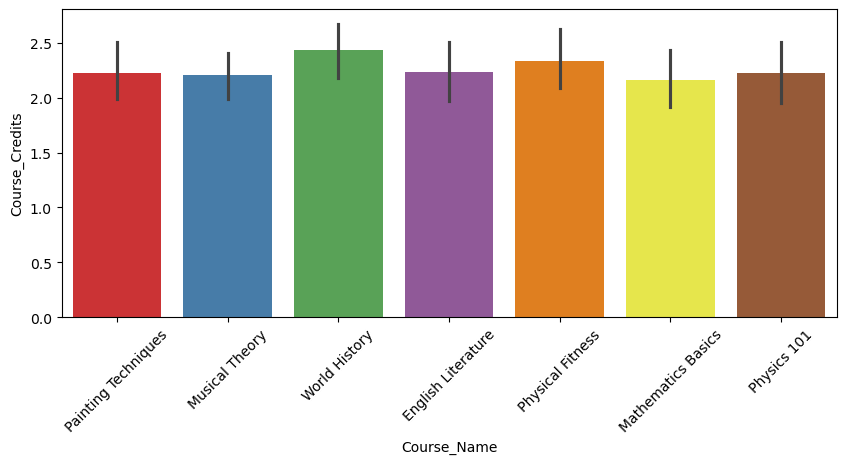

In [230]:
plt.figure(figsize=(10,4))
sns.barplot(x='Course_Name', y='Course_Credits', data = data, hue="Course_Name", palette='Set1')
plt.xticks(rotation=45)
plt.show()

In [236]:
#world hitory has the highest course credit which indicates 
#that this course has more materieal and rquires more efforts from the students to complet it.


## Insights
## Beginner and advanced courses have relatively higher completion rates compared to intermediate courses.
## Math and Science courses have higher completion rates, while Humanities and Music show lower rates.
## Courses related to Physical Education and Music attract the highest enrollments, while Math has the least.
## Courses with 6 and 12 weeks have slightly higher completion rates, while 8-week courses show a lower completion rate.
## Courses with 3 credits have the highest completion rates, indicating students are more likely to complete medium-credit courses.

# Recommendations 

# This suggests that intermediate courses may require more support to improve student retention and completion.
# We need to take feedbcaks from teh students enrolled in intermediate courses to find the reasons what is causing the effect.
# Feedback can be based on video content quality, trainers explanation, assessments. 